# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

### 1) Get train and target data
### Note: changing lable from "10" to "0" for both traing and test data sets 

In [3]:
### Note: changing lable from "10" to "0" for both traing and test data sets 

### training data and training targets variables
train_data = train['X']
train_targets = (train['y'] % 10)

### test data and test targets variables
test_data = test['X']
test_targets = (test['y'] % 10)

### 2) Normalize pixel values - train and test data

In [4]:

train_data = train_data / 255.0
test_data = test_data / 255.0

### 3) Check training and test data shape

In [5]:
print(f"train data dimentions: {train_data.shape}")
print(f"train targets dimentions: {train_targets.shape}")
print("="*100)
print(f"test data dimentions: {test_data.shape}")
print(f"test targets dimentions: {test_targets.shape}")

train data dimentions: (32, 32, 3, 73257)
train targets dimentions: (73257, 1)
test data dimentions: (32, 32, 3, 26032)
test targets dimentions: (26032, 1)


### 4) Reshape training and test as dimention (sample, hight, width, channels)

In [6]:
train_data = train_data.transpose(3, 0, 1, 2)
test_data = test_data.transpose(3, 0, 1, 2)

### 5) Check training and test data shape

In [7]:

print(f"train data dimentions: {train_data.shape}")
print(f"train targets dimentions: {train_targets.shape}")
print("="*100)
print(f"test data dimentions: {test_data.shape}")
print(f"test targets dimentions: {test_targets.shape}")

train data dimentions: (73257, 32, 32, 3)
train targets dimentions: (73257, 1)
test data dimentions: (26032, 32, 32, 3)
test targets dimentions: (26032, 1)


### 6) Plot: random 10 images from training data (color image).

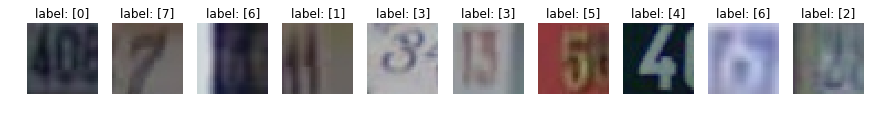

In [8]:
fig, ax = plt.subplots(1, 10, figsize=(15, 5))

for i in range(10):
    random_idx = np.random.choice(range(train_targets.shape[0]))
    ax[i].set_axis_off()
    ax[i].imshow(train_data[random_idx])
    ax[i].set_title(f"label: {train_targets[random_idx]}")

### 7) Convert training and testing image to Grayscale

In [9]:
train_data_scaled = np.mean(train_data, axis=-1, keepdims=True)
test_data_scaled = np.mean(test_data, axis=-1, keepdims=True)

### 8) Check training and test data shape

In [10]:
print(f"train data dimentions: {train_data_scaled.shape}")
print("="*100)
print(f"test data dimentions: {test_data_scaled.shape}")


train data dimentions: (73257, 32, 32, 1)
test data dimentions: (26032, 32, 32, 1)


### 9) Plot: random 10 images from training data (grayscale image).

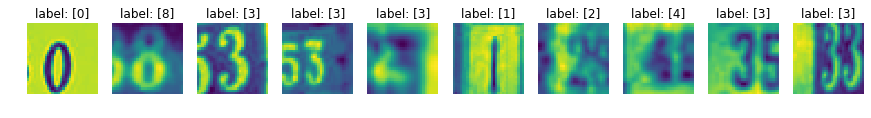

In [11]:

fig, ax = plt.subplots(1, 10, figsize=(15, 5))

for i in range(10):
    random_idx = np.random.choice(range(train_targets.shape[0]))
    ax[i].set_axis_off()
    ax[i].imshow(train_data_scaled[random_idx].squeeze(axis=-1))
    ax[i].set_title(f"label: {train_targets[random_idx]}")

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

### 1) Function: MLP model instantiation 

In [12]:

def get_model_mlp(regularization_factor, input_shape):
    """
        Instantiate Multilayer Perceptrion (MLP) classifier.
    """

    model_mlp = Sequential([
            Flatten(input_shape=input_shape, name='Flatten_1'),
            Dense(512, kernel_regularizer=regularizers.l2(regularization_factor), activation="relu", name='Dense_1'),
            Dense(128, kernel_regularizer=regularizers.l2(regularization_factor), activation="relu", name='Dense_2'),
            Dense(64, kernel_regularizer=regularizers.l2(regularization_factor), activation="relu", name='Dense_3'),
            Dense(10, activation="softmax",name='Dense_4')
                        ])

    return model_mlp


### 2) MLP model instantiation 

In [13]:
model_mlp = get_model_mlp(1e-5, train_data_scaled[0].shape)

### 3) MLP model summary

In [14]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
Dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
Dense_4 (Dense)              (None, 10)                650       
Total params: 599,370
Trainable params: 599,370
Non-trainable params: 0
_________________________________________________________________


### 4) MLP model compile

In [15]:
model_mlp.compile(optimizer="adam",
                  loss ="sparse_categorical_crossentropy",
                  metrics=['accuracy']
                 )

### 5) Funcations MLP: callbacks for Early stopping the model and saving best parameters.

In [16]:

def get_early_stopping_epoch_mlp():
    """
    Monitor validation accuracy to be constant consecutively for three epochs
    """
    
    early_stopping_epoch_mlp = EarlyStopping(monitor='val_accuracy', 
                                             patience=3,
                                             mode='max')
    return early_stopping_epoch_mlp


def get_checkpoint_best_only_mlp():
    
    """
    Save best model weights for maximum validation accuracy.
    """
    
    checkpoint_best_only_path = "checkpoints_best_only_mlp/checkpoint"
    
    checkpoint_best_only_mlp = ModelCheckpoint(filepath=checkpoint_best_only_path,
                                           save_weights_only=True,
                                           save_best_only=True,
                                           save_freq="epoch",
                                           monitor='val_accuracy',
                                           mode='max')
    return checkpoint_best_only_mlp

### 6) MLP: create callbacks

In [17]:
early_stopping_epoch_mlp = get_early_stopping_epoch_mlp()
checkpoint_best_only_mlp = get_checkpoint_best_only_mlp()

### 7) MLP model training

In [18]:
history_mlp = model_mlp.fit(x=train_data_scaled, y=train_targets,
                            epochs=30,
                            batch_size=64,
                            validation_split=0.2,
                            callbacks=[checkpoint_best_only_mlp, early_stopping_epoch_mlp],
                            verbose=1
                            )

Train on 58605 samples, validate on 14652 samples
Epoch 1/30
58605/58605 [==============================] - 67s 1ms/sample - loss: 2.1435 - accuracy: 0.2276 - val_loss: 1.8182 - val_accuracy: 0.3675
Epoch 2/30
58605/58605 [==============================] - 50s 850us/sample - loss: 1.5644 - accuracy: 0.4675 - val_loss: 1.4427 - val_accuracy: 0.5167
Epoch 3/30
58605/58605 [==============================] - 49s 843us/sample - loss: 1.2728 - accuracy: 0.5888 - val_loss: 1.1781 - val_accuracy: 0.6358
Epoch 4/30
58605/58605 [==============================] - 50s 846us/sample - loss: 1.1286 - accuracy: 0.6478 - val_loss: 1.1376 - val_accuracy: 0.6414
Epoch 5/30
58605/58605 [==============================] - 49s 844us/sample - loss: 1.0555 - accuracy: 0.6731 - val_loss: 1.0459 - val_accuracy: 0.6762
Epoch 6/30
58605/58605 [==============================] - 50s 849us/sample - loss: 1.0053 - accuracy: 0.6887 - val_loss: 1.0263 - val_accuracy: 0.6820
Epoch 7/30
58605/58605 [======================

### 8) MLP Plots: Loss vs Epochs and Accuracy vs Epochs for both training and validation data.

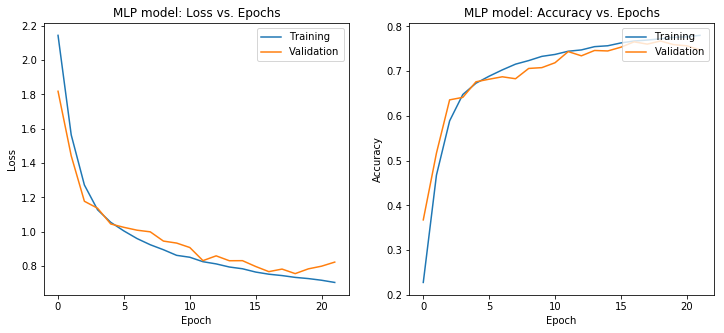

In [19]:


# Plot MLP model training and validation loss
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history_mlp.history['loss'])
plt.plot(history_mlp.history['val_loss'])
plt.title('MLP model: Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot MLP model training and validation accuracy
fig.add_subplot(122)

plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title('MLP model: Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### 9) Function: evaluate MLP

In [20]:

def evaluate_model_mlp(model_mlp, scaled_test_images, test_labels):
    
    test_loss_mlp, test_accuracy_mlp = model_mlp.evaluate(scaled_test_images, test_labels, verbose=2)
    
    return test_loss_mlp, test_accuracy_mlp

### 10) MLP: evaluate test image data 

In [21]:
test_loss_mlp, test_accuracy_mlp = evaluate_model_mlp(model_mlp, test_data_scaled, test_targets)

26032/1 - 11s - loss: 0.8047 - accuracy: 0.7350


In [22]:
print(f" MLP model - test data loss: {test_loss_mlp:0.3f}")
print(f" MLP model - test data accuracy: {test_accuracy_mlp:0.3f}")

 MLP model - test data loss: 0.900
 MLP model - test data accuracy: 0.735


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

### 1) Function: CNN model instantiation 

In [23]:

def get_model_cnn(input_shape, drop_rate):
    """
        Instantiate Convolutional Neural Network (CNN) classifier.
    """

    model_cnn = Sequential([
                        Conv2D(filters=16, 
                               kernel_size=(3,3), 
                               padding='SAME', 
                               activation='relu',
                               input_shape=input_shape,
                               name='Conv2D_1'),
                        Conv2D(filters=8,
                               kernel_size=(3,3),
                               padding='SAME',
                               activation='relu',
                               name='Conv2D_2'),
                        MaxPooling2D(pool_size=(8,8), name='pool_1'),
                        Flatten(name='Flatten_1'),
                        Dense(128, activation="relu", name='Dense_1'),
                        BatchNormalization(),
                        Dropout(drop_rate),
                        Dense(64, activation="relu", name='Dense_2'),
                        Dense(10, activation="softmax",name='Dense_3')
                        ])

    return model_cnn



### 2) CNN model instantiation 

In [24]:
model_cnn = get_model_cnn(train_data_scaled[0].shape, 0.3)

### 3) CNN model summary

In [25]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 4, 4, 8)           0         
_________________________________________________________________
Flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)              

### 4) CNN model compile

In [26]:
model_cnn.compile(optimizer="adam",
                  loss ="sparse_categorical_crossentropy",
                  metrics=['accuracy']
                 )

### 5) Functions: callbacks for Early stopping the model and saving best parameters.

In [27]:

def get_early_stopping_epoch_cnn():
    """
    Monitor validation accuracy to be constant consecutively for three epochs
    """
    
    early_stopping_epoch_cnn = EarlyStopping(monitor='val_accuracy', 
                                             patience=3,
                                             mode='max')
    return early_stopping_epoch_cnn


def get_checkpoint_best_only_cnn():
    
    """
    Save best model weights for maximum validation accuracy.
    """
    
    checkpoint_best_only_path = "checkpoints_best_only_cnn/checkpoint"
    
    checkpoint_best_only_cnn = ModelCheckpoint(filepath=checkpoint_best_only_path,
                                           save_weights_only=True,
                                           save_best_only=True,
                                           save_freq="epoch",
                                           monitor='val_accuracy',
                                           mode='max')
    return checkpoint_best_only_cnn

### 6) CNN: create the callbacks objects

In [28]:
early_stopping_epoch_cnn = get_early_stopping_epoch_cnn()
checkpoint_best_only_cnn = get_checkpoint_best_only_cnn()

### 7) CNN model training

In [29]:
history_cnn = model_cnn.fit(x=train_data_scaled, y=train_targets,
                            epochs=30,
                            batch_size=64,
                            validation_split=0.2,
                            callbacks=[checkpoint_best_only_cnn, early_stopping_epoch_cnn],
                            verbose=1
                            )

Train on 58605 samples, validate on 14652 samples
Epoch 1/30
58605/58605 [==============================] - 334s 6ms/sample - loss: 1.2785 - accuracy: 0.5701 - val_loss: 1.0796 - val_accuracy: 0.6558
Epoch 2/30
58605/58605 [==============================] - 319s 5ms/sample - loss: 0.8419 - accuracy: 0.7294 - val_loss: 0.7487 - val_accuracy: 0.7589
Epoch 3/30
58605/58605 [==============================] - 314s 5ms/sample - loss: 0.7589 - accuracy: 0.7583 - val_loss: 0.7424 - val_accuracy: 0.7611
Epoch 4/30
58605/58605 [==============================] - 316s 5ms/sample - loss: 0.7058 - accuracy: 0.7748 - val_loss: 0.6758 - val_accuracy: 0.7877
Epoch 5/30
58605/58605 [==============================] - 318s 5ms/sample - loss: 0.6767 - accuracy: 0.7870 - val_loss: 0.6440 - val_accuracy: 0.7942
Epoch 6/30
58605/58605 [==============================] - 317s 5ms/sample - loss: 0.6502 - accuracy: 0.7942 - val_loss: 0.6009 - val_accuracy: 0.8075
Epoch 7/30
58605/58605 [==========================

### 8) CNN Plots: Loss vs. Epochs and Accuracy vs. Epochs for both training and validation data.

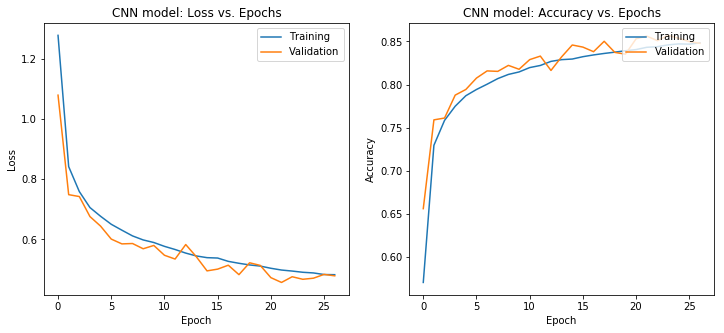

In [30]:

# Plot MLP model training and validation loss
fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN model: Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

# Plot MLP model training and validation accuracy
fig.add_subplot(122)

plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN model: Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### 9) Function: evaluate CNN

In [31]:
def evaluate_model_cnn(model_cnn, scaled_test_images, test_labels):
    
    test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(scaled_test_images, test_labels, verbose=2)
    
    return test_loss_cnn, test_accuracy_cnn

### 10) CNN: evaluate test image data 

In [32]:
test_loss_cnn, test_accuracy_cnn = evaluate_model_cnn(model_cnn, test_data_scaled, test_targets)

26032/1 - 42s - loss: 0.4812 - accuracy: 0.8404


In [34]:
print(f" CNN test data loss: {test_loss_cnn:0.3f}")
print(f" CNN test data accuracy: {test_accuracy_cnn:0.3f}")

 CNN test data loss: 0.522
 CNN test data accuracy: 0.840


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

### 1) MLP: load best weights

In [35]:
### 2) MLP: load best weights
new_model_mlp = get_model_mlp(1e-5, train_data_scaled[0].shape)

new_model_mlp.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                 )

new_model_mlp.load_weights("checkpoints_best_only_mlp/checkpoint")


### 2) Get MLP model predictions on 5 randomly selected scaled test images

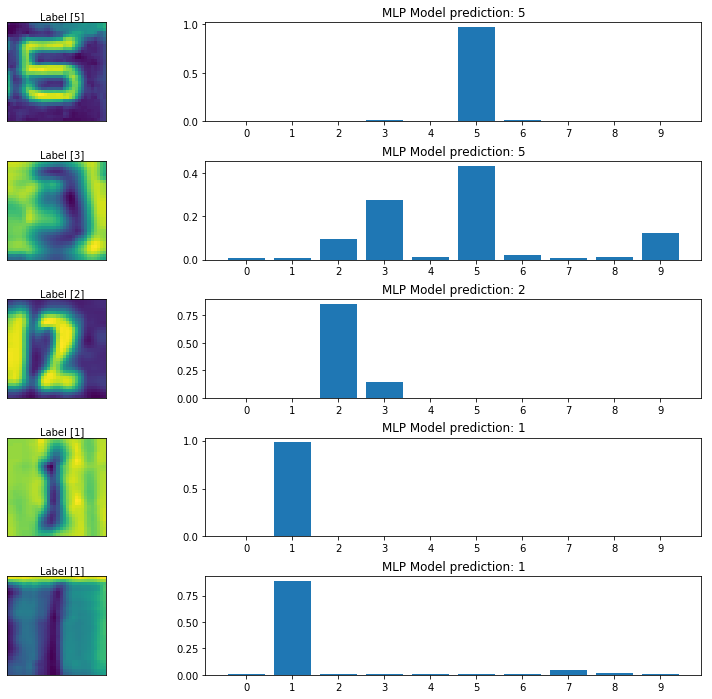

In [36]:


num_test_images = test_data_scaled.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_data_scaled[random_inx, ...]
random_test_labels = test_targets[random_inx, ...]

predictions = new_model_mlp.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Label {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"MLP Model prediction: {np.argmax(prediction)}")
    
plt.show()

### 3) CNN: load best weights

In [37]:


new_model_cnn = get_model_cnn(train_data_scaled[0].shape, 0.3)
new_model_cnn.load_weights("checkpoints_best_only_cnn/checkpoint")

new_model_cnn.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                 )


### 4) Get model predictions on randomly selected test images

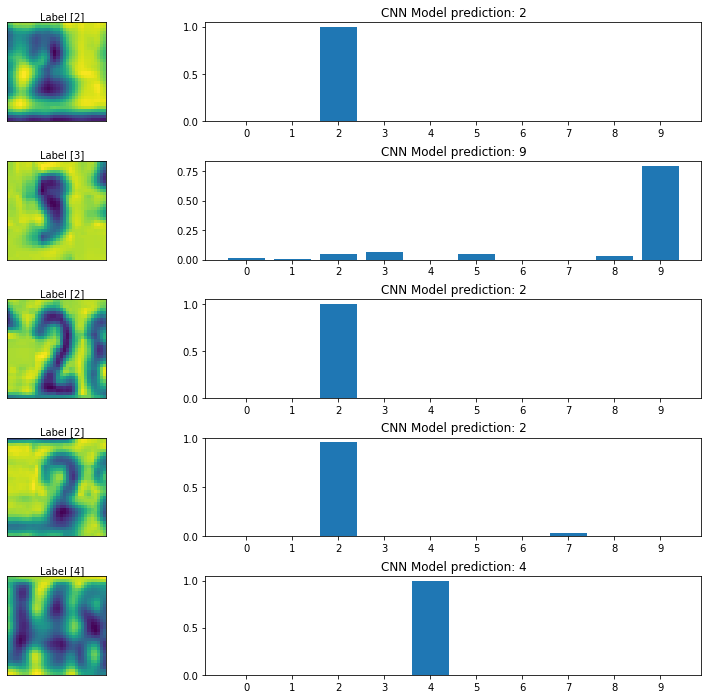

In [38]:


num_test_images = test_data_scaled.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_data_scaled[random_inx, ...]
random_test_labels = test_targets[random_inx, ...]

predictions = new_model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Label {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"CNN Model prediction: {np.argmax(prediction)}")
    
plt.show()